# Project: Investigate a Dataset - [No_Show_Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information on the medical appointments for 110,527 patients in Brazil. The aim of the data collection is to ascertain the factors that affect the ability of the patients to show up for their scheduled appointments. "No-shows", which can refer to patients who do not turn up for their appointments, can cost the hospital time, money and also disrupt the care of other patients. Therefore, this analysis is important to create tangible insights for the Brazil health care system to enable them understand the reason for "No-shows", and also make any necessary adjustments. 

### Decsription of the Variables

Having established these facts, we can then run through the description of the fourteen (14) variables in the dataset. These include:

| SN | Variable | Description |
| ---: | :--- | :--- |
| 1. | Patient ID | this is the identification number of the patients |
| 2. | Appointment ID | this refers to the identification number for each appointment |
| 3. | Gender | Male (M) or Female (F) | 
| 4. | ScheduledDay | the day the patient registered for the appointment. This occurs before the actual appointment day. |
| 5. | AppointmentDay | the actual appointment day. |
| 6. | Age | age of the patient |
| 7. | Neighbourhood | this refers to the location for the appointment |
| 8. | Scholarship | this refers to patients who are recipients of the "Bolsa Familia", a social welfare program of the Brazil Government |
| 9. | Hipertension | is the patient hypertensive? True (1) or False (0) |
| 10. | Diabetes | is the patient diabetic? True (1) or False (0) |
| 11. | Alcoholism | is the patient an alcoholic? True (1) or False (0) | 
| 12. | Handcap | is the patient handicapped? True (1) or False (0) | 
| 13. | SMS-received | one or more messages sent to the patient: Yes (1) or No (0) | 
| 14. | No-show | is the patient a no-show? Yes (1) or No (0) | 

### Questions for Analysis
According to [equiscript](https://www.equiscript.com/blog/patient-no-shows#:~:text=Patients%20who%20miss%20appointments%20often,they%20attend%20their%20rescheduled%20appointment), there are several reasons patients miss appointments. Some studies revealed that women are more likely to be a no-show. In [noshowappointments](https://www.kaggle.com/datasets/joniarroba/noshowappointments), the description site for this dataset, an emphasis was placed on the fact that the proportion of the females was higher because they tend to be more health conscious compared to the men. 

The day of the week and month of the appointment also has an effect on patient no-shows. Additionally, reminders can be effective in preventing no-shows. Based on this information, this analysis will explore the following questions:
1. Are the females more likely to miss an appointment? 
2. What variables are correlated with 'show'?:

>**Specific Variables of Interest**: 
1. Appointment day of the week
2. Appointment day of the month
3. Number of waiting days between the scheduled day and the appointment day
4. SMS reminder

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


Note: After running the cell above, restart the kernel, and run the codes again to avoid errors in the subsequent cells.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load the data and check its structure using head(), info(), and shape
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Some Column names like "Hipertension", and "Handcap", are not spelt correctly.  

In [4]:
df.shape

(110527, 14)

There are 110527 rows and 14 columns in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The data set is quite clean. There are no null values or duplicates. However,the datatype for "PatientId", "ScheduledDay", and "AppointmentDay" are incorrect. This will be adjusted in the data cleaning section.  

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum value for "Age" is "-1", and this value is impossible in reality. Therefore, rows with values for age less than or equal to zero will be dropped in the cleaning section.


### Data Cleaning

In [9]:
# For this analysis, the columns "PatientId" and "AppointmentId" will be dropped.
# Instead of the unique Ids, the row numbers in the dataset will be used for identification.
df.drop(columns=['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Rename Columns 'Hipertension', 'Handcap', and 'No-show'
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'Show'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In the No-Show column, 'Yes' signifies that a patient did not show up for an appointment, and 'No' signifies that a patient showed up for an appointment. To make it easier to understand the analysis, 'No-Show' column has been renamed to 'Show'. Based on the explanation in the first sentence, 'Yes' can be 0, and 'No' can be 1.   

In [11]:
# Convert 'Show' to an integer with 'Yes' as 0 and 'No' as 1 (note: 1 = show and 0 = no-show)
df['Show']=df['Show'].map({'Yes':0,'No':1})
df['Show']=df['Show'].astype(int)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [12]:
# change the datatypes for 'ScheduledDay', and 'AppointmentDay' to datetime
import datetime as dt
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
Show                            int64
dtype: object

In [13]:
# Extract only the dates for 'ScheduledDay' and 'AppointmentDay'
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [14]:
# Create a new column for waiting days, which is the number of days between the Scheduled day
# and the Appointment day
df['Wait_Days'] = df['AppointmentDay'] - df['ScheduledDay']
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Wait_Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days


In [15]:
# Convert Wait_Days to an integer by extracting number of days
df['Wait_Days'] = df['Wait_Days'].dt.days
df.head()
#df['Wait_Days'].dtype - this can be used to confirm the conversion

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Wait_Days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0


In [16]:
df['Wait_Days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Wait_Days, dtype: float64

The minimum value for 'Wait_Days' is '-6', and this is not possible in reality. This will be treated as an error, and the rows with Wait_Days values less than zero will be dropped.

In [17]:
# Drop rows where 'Wait_Days' < 0
df.drop(df[df['Wait_Days'] < 0].index, inplace = True)
df['Wait_Days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Wait_Days, dtype: float64

There were five(5) rows with Wait_Day values less than zero.

In [18]:
# Extract Appointment year, month, and day of the week from Appointment Day
from datetime import datetime
def parse_date(date):
    if date == '':
        return None
    else:
        return (datetime.strptime(str(date), "%Y-%m-%d"))
    
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
def get_hour(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split(' ')[1].split(':')[0])

def get_year(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[0])
    
def get_month(date):
    if date == '':
        return None
    else:
        return parse_maybe_int(str(parse_date(date)).split('-')[1])
    
def get_day(date):
    if date == '':
        return None
    else:
        return parse_date(date).strftime('%A')

df['appointment_year'] = df['AppointmentDay'].apply(lambda x: get_year(x))
df['appointment_month'] = df['AppointmentDay'].apply(lambda x: get_month(x))
df['appointment_dayofweek'] = df['AppointmentDay'].apply(lambda x: get_day(x))
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Wait_Days,appointment_year,appointment_month,appointment_dayofweek
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,2016,4,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,2016,4,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,2016,4,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,2016,4,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,2016,4,Friday


In [19]:
# Having extracted the year, day, month and calculating wait days, 
# the scheduled day and appointment day columns can be dropped
df.drop(columns=['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show,Wait_Days,appointment_year,appointment_month,appointment_dayofweek
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,2016,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,2016,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,2016,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,2016,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,2016,4,Friday


In [20]:
# Drop rows where 'Age' < 0. In Brazil, age is counted from 0.
df.drop(df[df['Age'] < 0].index, inplace = True)
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [21]:
# Change all column names to lower case
df.columns= df.columns.str.lower()
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,wait_days,appointment_year,appointment_month,appointment_dayofweek
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,2016,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,2016,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,2016,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,2016,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,2016,4,Friday


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Are the females more likely to miss an appointment?

In [22]:
# For starters, confirm the proportion of males and females in the dataset
# Proportion = number of gender/total number of patients
df.gender.value_counts()

F    71836
M    38685
Name: gender, dtype: int64

In [23]:
# Proportion of males
prop_male = df.gender.value_counts()[1] / len(df)
prop_male

0.35002397734367224

In [24]:
# Proportion of females
prop_female = df.gender.value_counts()[0] / len(df)
prop_female

0.6499760226563278

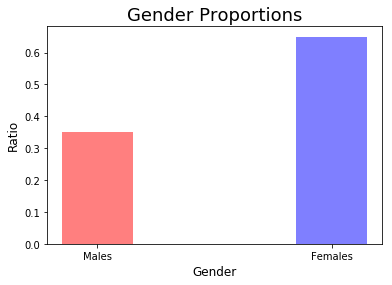

In [25]:
# Visualizing the proportions
male_bar = plt.bar(0, prop_male, width=.3, alpha=0.5, color ='red')
female_bar = plt.bar(1, prop_female, width=.3, alpha=0.5, color='blue',)

# title and labels
plt.xticks([0, 1], ['Males', 'Females'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.title('Gender Proportions', fontsize=18);

The bar plot shows that the proportion of the female patients is almost twice the proportion of the male patients. Having confirmed this fact, the question on whether the female patients are more likely to miss their appointments can be answered. This question will be answered from two angles: 
1. What proportion of the total number of patients who miss their appointments do females account for?
2. Is there any observable difference between the proportion of females and males who miss their appointments?

#### What proportion of the total number of patients who miss their appointments do females account for?
This question will be answered using a visualization of the total no show patients by gender proportion. But first, a visualization of the proportion of patients who show up for appointments to patients who do not show up will be done.

In [26]:
# Create a dataframe with no-show patients
df_noshow = df.query('show == 0')
df_noshow.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,wait_days,appointment_year,appointment_month,appointment_dayofweek
6,F,23,GOIABEIRAS,0,0,0,0,0,0,0,2,2016,4,Friday
7,F,39,GOIABEIRAS,0,0,0,0,0,0,0,2,2016,4,Friday
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,0,3,2016,4,Friday
17,F,40,CONQUISTA,1,0,0,0,0,0,0,1,2016,4,Friday
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,0,2,2016,4,Friday


In [27]:
# Total number of no-show patients
df_noshow['show'].count()

22314

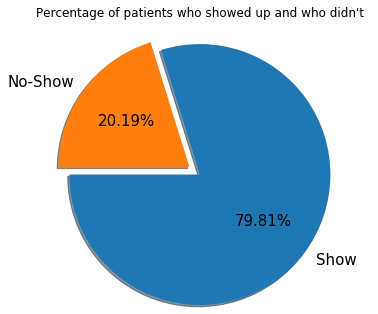

In [28]:
# A pie chart of the proportion of show to no-show patients
label_Names = ["Show", "No-Show"]
data = [df.loc[(df['show'] == 1)].count()[0], df.loc[(df['show'] == 0)].count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, 
        startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);

The pie-chart indicates that 79.81% of the patients showed up for their appointments, while 20.19% (22314 patients) did not show up for their appointments. From the 20.19% no-shows, this analysis will show how many patients are females. This question can be answered with a visualization of the total no show patients by gender proportion.

In [29]:
# Group by gender and find the proportion of male to female no-show patients
df_noshow.groupby('gender')['show'].count()

gender
F    14591
M     7723
Name: show, dtype: int64

In [30]:
# Proportion of no-show male patients
noshow_male = df_noshow.gender.value_counts()[1] / len(df_noshow)
noshow_male

0.3461055839383347

In [31]:
# Proportion of no-show female patients
noshow_female = df_noshow.gender.value_counts()[0] / len(df_noshow)
noshow_female

0.6538944160616653

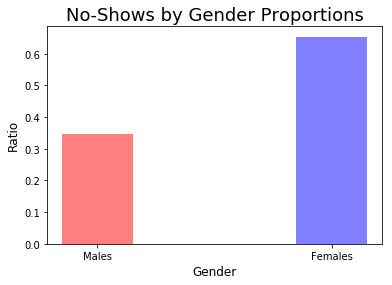

In [32]:
# Visualizing the no-show proportions
noshow_male_bar = plt.bar(0, noshow_male, width=.3, alpha=0.5, color ='red')
noshow_female_bar = plt.bar(1, noshow_female, width=.3, alpha=0.5, color='blue',)

# title and labels
plt.xticks([0, 1], ['Males', 'Females'])
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.title('No-Shows by Gender Proportions', fontsize=18);

This bar chart is very similar to the barchat on the general proportion of male and female patients in the dataset. The proportion of no-show females is almost twice that of the no-show males. This can imply that the females account for a larger proportion of the total no-show patients because they also account for a larger proportion of the total number of patients. This also suggests that gender might not have an effect on no-show patients in Brazil. Additionally, the results of the analysis do not strongly suggest that females are more likely to miss an appointment. 

#### Is there any observable difference between the proportion of females and males who miss their appointments?
A visualization of the appointment show rate of no-show patients by gender can be used to answer this question. 

In [33]:
# Calculate the appointment show rate by gender
df_showrate = df.groupby('gender')['show'].mean()
df_showrate

gender
F    0.796885
M    0.800362
Name: show, dtype: float64

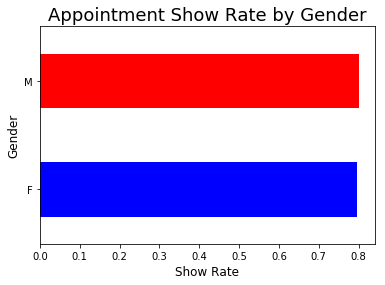

In [34]:
# Visualization of appointment show rate by gender
df_showrate.plot.barh(color = ('blue', 'red'))

# title and labels
plt.ylabel('Gender', fontsize=12)
plt.xlabel('Show Rate', fontsize=12)
plt.title('Appointment Show Rate by Gender', fontsize=18);

The appointment showrate for male and female patients is 80% and 79.7% respectively. This implies that there is no observable difference in the appointment showrate for both male and female patients. And this observation is clearly represented by the horizontal barplot. Therefore, it can be concluded, by observation, that females are not more prone to be no-shows. As earlier stated, this can also imply that gender has no effect on no-show patients. However, observations cannot provide sufficient evidence to reach this conclusion. Statistical tests are more valid when drawing conclusions.  

### Research Question 2: What variables are correlated with 'show'?
As earlier stated, there are some variables of interest based on background research. These variables are: 
1. Appointment day of the week (appointment_day)
2. Appointment day of the month (appointment_month)
3. Number of waiting days between the scheduled day and the appointment day (wait_days)
4. SMS reminder (sms_received)

In [35]:
# construct the correlation matrix for the dataset
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,wait_days,appointment_year,appointment_month
age,1,-0.0924685,0.504599,0.292398,0.0958114,0.0781009,0.0126289,0.0603196,0.0348128,nan,0.014569
scholarship,-0.0924685,1,-0.0197379,-0.0248986,0.0350194,-0.00855463,0.00118171,-0.0291659,-0.0304352,nan,-0.00258922
hypertension,0.504599,-0.0197379,1,0.433082,0.0879667,0.0801623,-0.00628549,0.0356623,-0.0172362,nan,0.00377639
diabetes,0.292398,-0.0248986,0.433082,1,0.0184709,0.0575783,-0.0145606,0.0151576,-0.0272003,nan,0.0037392
alcoholism,0.0958114,0.0350194,0.0879667,0.0184709,1,0.00466772,-0.0261544,0.000180941,-0.038527,nan,0.00391874
handicap,0.0781009,-0.00855463,0.0801623,0.0575783,0.00466772,1,-0.0240973,0.0062898,-0.0197737,nan,-0.00143022
sms_received,0.0126289,0.00118171,-0.00628549,-0.0145606,-0.0261544,-0.0240973,1,-0.126502,0.398128,nan,0.10807
show,0.0603196,-0.0291659,0.0356623,0.0151576,0.000180941,0.0062898,-0.126502,1,-0.18632,nan,0.0208412
wait_days,0.0348128,-0.0304352,-0.0172362,-0.0272003,-0.038527,-0.0197737,0.398128,-0.18632,1,nan,0.00384755
appointment_year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


The correlation matrix reveals that there is a strong positive correlation between age and hypertension (0.504599), a weak positive correlation between age and diabetes (0.292398), and a moderate positive correlation between hypertension and diabetes. However, this analysis will not explore these variables further because they are not correlated with 'show', which is the dependent variable in this analysis. Furthermore, this analysis focuses on the variables of interest; the correlation matrix shows that there is a weak negative correlation between sms_received and show (-0.126502), and between wait_days and show (-0.18632). There is also a moderate positive correlation between sms_received and wait_days. This is quite logical because patients with more days between their scheduled day and appointment day are more likely to receive a reminder.

This section will explore wait_days and sms_received, as well as appointment day and month.

#### Wait_days vs Show

In [36]:
# Explore wait_days
print(df.wait_days.describe())
df.wait_days.mode()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: wait_days, dtype: float64


0    0
dtype: int64

The minimum number of waiting days is 0 days, which implies that some patients get their appointments on the same day they scheduled. The maximum number of waiting days is 179 days, and the average number of waiting days is 4 days. The most frequent number of waiting days is 0.

In [37]:
# How many patients have 0 waiting days?
df_0waiting = df.query('wait_days == 0')
df_0waiting.count()

gender                   38562
age                      38562
neighbourhood            38562
scholarship              38562
hypertension             38562
diabetes                 38562
alcoholism               38562
handicap                 38562
sms_received             38562
show                     38562
wait_days                38562
appointment_year         38562
appointment_month        38562
appointment_dayofweek    38562
dtype: int64

38562 patients had their appointments on the same day they scheduled the appointment. Perhaps this might be a reason for noshows. 

In [38]:
# How many of these patients were no-shows?
df_0noshow = df_0waiting.query('show == 0')
df_0noshow.count()

gender                   1792
age                      1792
neighbourhood            1792
scholarship              1792
hypertension             1792
diabetes                 1792
alcoholism               1792
handicap                 1792
sms_received             1792
show                     1792
wait_days                1792
appointment_year         1792
appointment_month        1792
appointment_dayofweek    1792
dtype: int64

1792 patients out of the 38562 patients with 0 waiting days were no-shows. For these patients, what was the most frequent appointment day?

In [39]:
df_0noshow['appointment_dayofweek'].describe()

count          1792
unique            5
top       Wednesday
freq            465
Name: appointment_dayofweek, dtype: object

The most frequent appointment day for noshow patients with 0 waiting days was Wednesday.

In [40]:
# A dataframe for patients that do not show up for their appointments has been created previously (df_noshow)
# Create a dataframe for patients that show up for their appointments
df_show = df.query('show == 1')
df_show.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,wait_days,appointment_year,appointment_month,appointment_dayofweek
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,2016,4,Friday
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,2016,4,Friday
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,2016,4,Friday
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,2016,4,Friday
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,2016,4,Friday


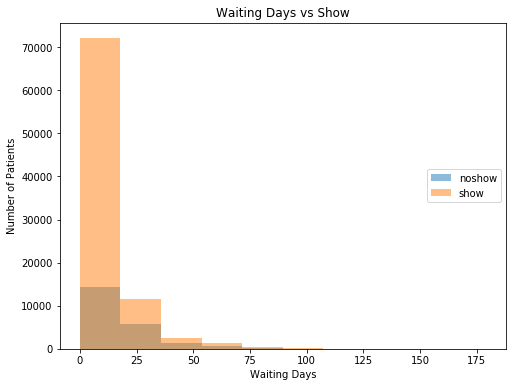

In [41]:
# Visualize the relationship between wait days and show with a histogram
fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_noshow['wait_days'], alpha=0.5, label='noshow')
ax.hist(df_show['wait_days'], alpha=0.5, label='show')
ax.set_title('Waiting Days vs Show')
ax.set_xlabel('Waiting Days')
ax.set_ylabel('Number of Patients')
ax.legend(loc='right')
plt.show();

The visualization reveals that the higher the number of waiting days, the higher the number of no-show patients. The plot might look a bit tricky, but on closer observation, it can be noted that the proportion of patients with waiting days between 0days and 3 weeks is highest. Furthermore, the ratio of patients that showed up to patients that did not show up is about 4:1. This implies that 1 patient out of every 5 patients is likely to miss an appointment. For patients with waiting days between a month and above, the ratio is about 2:1. This implies that 1 patient out of every 3 patients is likely to miss an appointment. This corresponds with the results of the correlation matrix that there is a negative correlation between show and wait days even if this correlation is very weak. As stated earlier, observations are not sufficient to make a conclusion. They can only serve as guides for further statistical analysis and consequent inferences.  

#### Sms_received vs Show

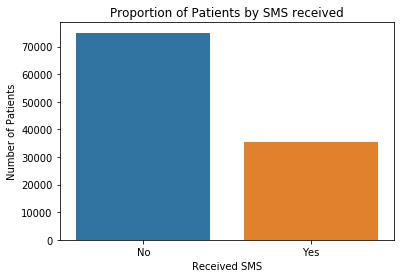

In [42]:
# Visualize the proportion of patients that received and that did not receive an sms
sns.countplot(x = 'sms_received', data = df)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Proportion of Patients by SMS received")
plt.xlabel("Received SMS")
plt.ylabel("Number of Patients")
plt.show()

About 75000 patients did not receive an sms, and roughly 35000 patients received an sms. Does this have any relationship with show?

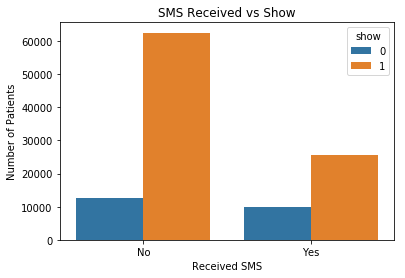

In [43]:
# Visualize the relationship between sms received and show
sns.countplot(x = 'sms_received', data = df, hue = 'show')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('SMS Received vs Show')
plt.xlabel("Received SMS")
plt.ylabel("Number of Patients")
plt.show()

The plot corresponds to the surprising results of the correlation matrix. Although weak, there is a negative relationship between show and sms received. From the background research, communication by text or call has proven to be an effective means of preventing no-shows. However, this is not the case for this dataset. Interesting insights can be uncovered with further statistical analysis, coupled with an understanding of the Brazilian context. 

<a id='conclusions'></a>
## Conclusions

This aim of this analysis was to uncover insights on the factors that lead to no-shows in Brazil, based on a dataset containing information on the medical appointments for 110,527 patients in Brazil. Based on some background research, this analysis sought to answer questions on the likelihood of female patients to miss their appointments, and the variables that were correlated with 'show', the dependent variable. The major variables of interest were waiting days and sms received. 

The results suggested that females were not more likely to miss their appointments because the ratio of female to male patients in the dataset was 2:1. The dataset description on kaggle stated that the female patients were more conscious of their health compared to their male counterparts. Furthermore, the appointment show rate for the female and male patients were 79.7% and 80% respectively. There was significant difference by observation, and this could mean that gender does not affect appointment show rate. The results also suggested that there is no correlation between gender and show in the dataset. However, this is not conclusive becasue no statistical tests were performed. Additional research can be carried out to ascertain whether or not gender has an effect on show. The results will be interesting because previous research has established the fact that females are more likely to miss their appointments.

According to the correlation matrix, there was no strong correlation between show and any of the independent variables of interest. Show had a very weak negative correlation with waiting days and sms received. Further exploration of the independent variables revealed that an increase in the number of waiting days led to an increase in the number of no-shows based on the proportion of patients allocated to each waiting period. Again, this cannot be conclusive because no statistical tests were carried out. The insights from this analysis on the most frequent day of no-shows for patients with zero waiting days, as well as other insights, could form the basis of additional statistical tests to draw tangible inferences. 

Finally, the fact that sms received had a negative relationship with Show is also worth investigating. This is because it is opposite to the apriori expectation. Additionally, an understanding of the Brazilian context could help explain the seeming anomalies in the results. 

**Limitations**:
There was not much information on the Brazilian medical context. Most of the variables did not have any correlation with the dependent variable of interest for this data analysis. Additionally, I was not able to perform any statistical analysis on the data set. So, I could not get as much insights as required.

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0